<a href="https://colab.research.google.com/github/ShirFah/Homework_2/blob/main/OneNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 6.79 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [2]:
cd OneNet

/content/OneNet


#  installing torchvison according to your cuda version

In [6]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [7]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 29.8 MB/s 
     |████████████████████████████████| 7.6 MB 4.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch

# restart runtime after installing

In [8]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [9]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


# install onenet

In [10]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/projects
copying detectron2/projects/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/projects
creating build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/rotated_boxes.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/keypoints.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/masks.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/image_list.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/structures/instances.py -> build/lib.linux-x86_64-3.7/detectron2/structures
copying detectron2/struct

# link coco datset to OneNet dateset folder
## download COCO dataset and then link the folder with OneNet

In [11]:
!mkdir -p datasets/coco
!ln -s /path_to_coco_dataset/annotations datasets/coco/annotations
!ln -s /path_to_coco_dataset/train2017 datasets/coco/train2017
!ln -s /path_to_coco_dataset/val2017 datasets/coco/val2017

In [12]:
pip install -U iopath

# train ONeNet

In [13]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=[], resume=False)
[05/02 12:29:26 detectron2]: Rank of current process: 0. World size: 1
[05/02 12:29:27 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvisi

# Evaluate

In [17]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --eval-only MODEL.WEIGHTS configs/model_onenet_r50dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'configs/model_onenet_r50dcn.pth'], resume=False)
[05/02 12:50:06 detectron2]: Rank of current process: 0. World size: 1
[05/02 12:50:07 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME               /usr/l

# Visualize
install opencv additinoally for visualize

In [ ]:
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip test2017.zip

In [22]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
   --input /content/dog-hug.jpg --output output_image1 --confidence-threshold 0.6  \
    --opts MODEL.WEIGHTS configs/model_onenet_r50dcn.pth

[05/02 12:53:48 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', input=['/content/dog-hug.jpg'], opts=['MODEL.WEIGHTS', 'configs/model_onenet_r50dcn.pth'], output='/content/OneNet/output_image', video_input=None, webcam=False)
[05/02 12:53:50 fvcore.common.checkpoint]: [Checkpointer] Loading from configs/model_onenet_r50dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][05/02 12:53:51 detectron2]: /content/dog-hug.jpg: detected 2 instances in 0.28s
100% 1/1 [00:01<00:00,  1.90s/it]


In [33]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
   --input /content/dog.jpg --output output_image2 --confidence-threshold 0.6  \
    --opts MODEL.WEIGHTS configs/model_onenet_r50dcn.pth

[05/02 13:03:37 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', input=['/content/dog.jpg'], opts=['MODEL.WEIGHTS', 'configs/model_onenet_r50dcn.pth'], output='output_image2', video_input=None, webcam=False)
[05/02 13:03:40 fvcore.common.checkpoint]: [Checkpointer] Loading from configs/model_onenet_r50dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][05/02 13:03:41 detectron2]: /content/dog.jpg: detected 1 instances in 0.17s
100% 1/1 [00:00<00:00,  1.85it/s]


In [25]:
from PIL import Image
im1 = Image.open(r"/content/OneNet/output_image1.png")
im1.show()

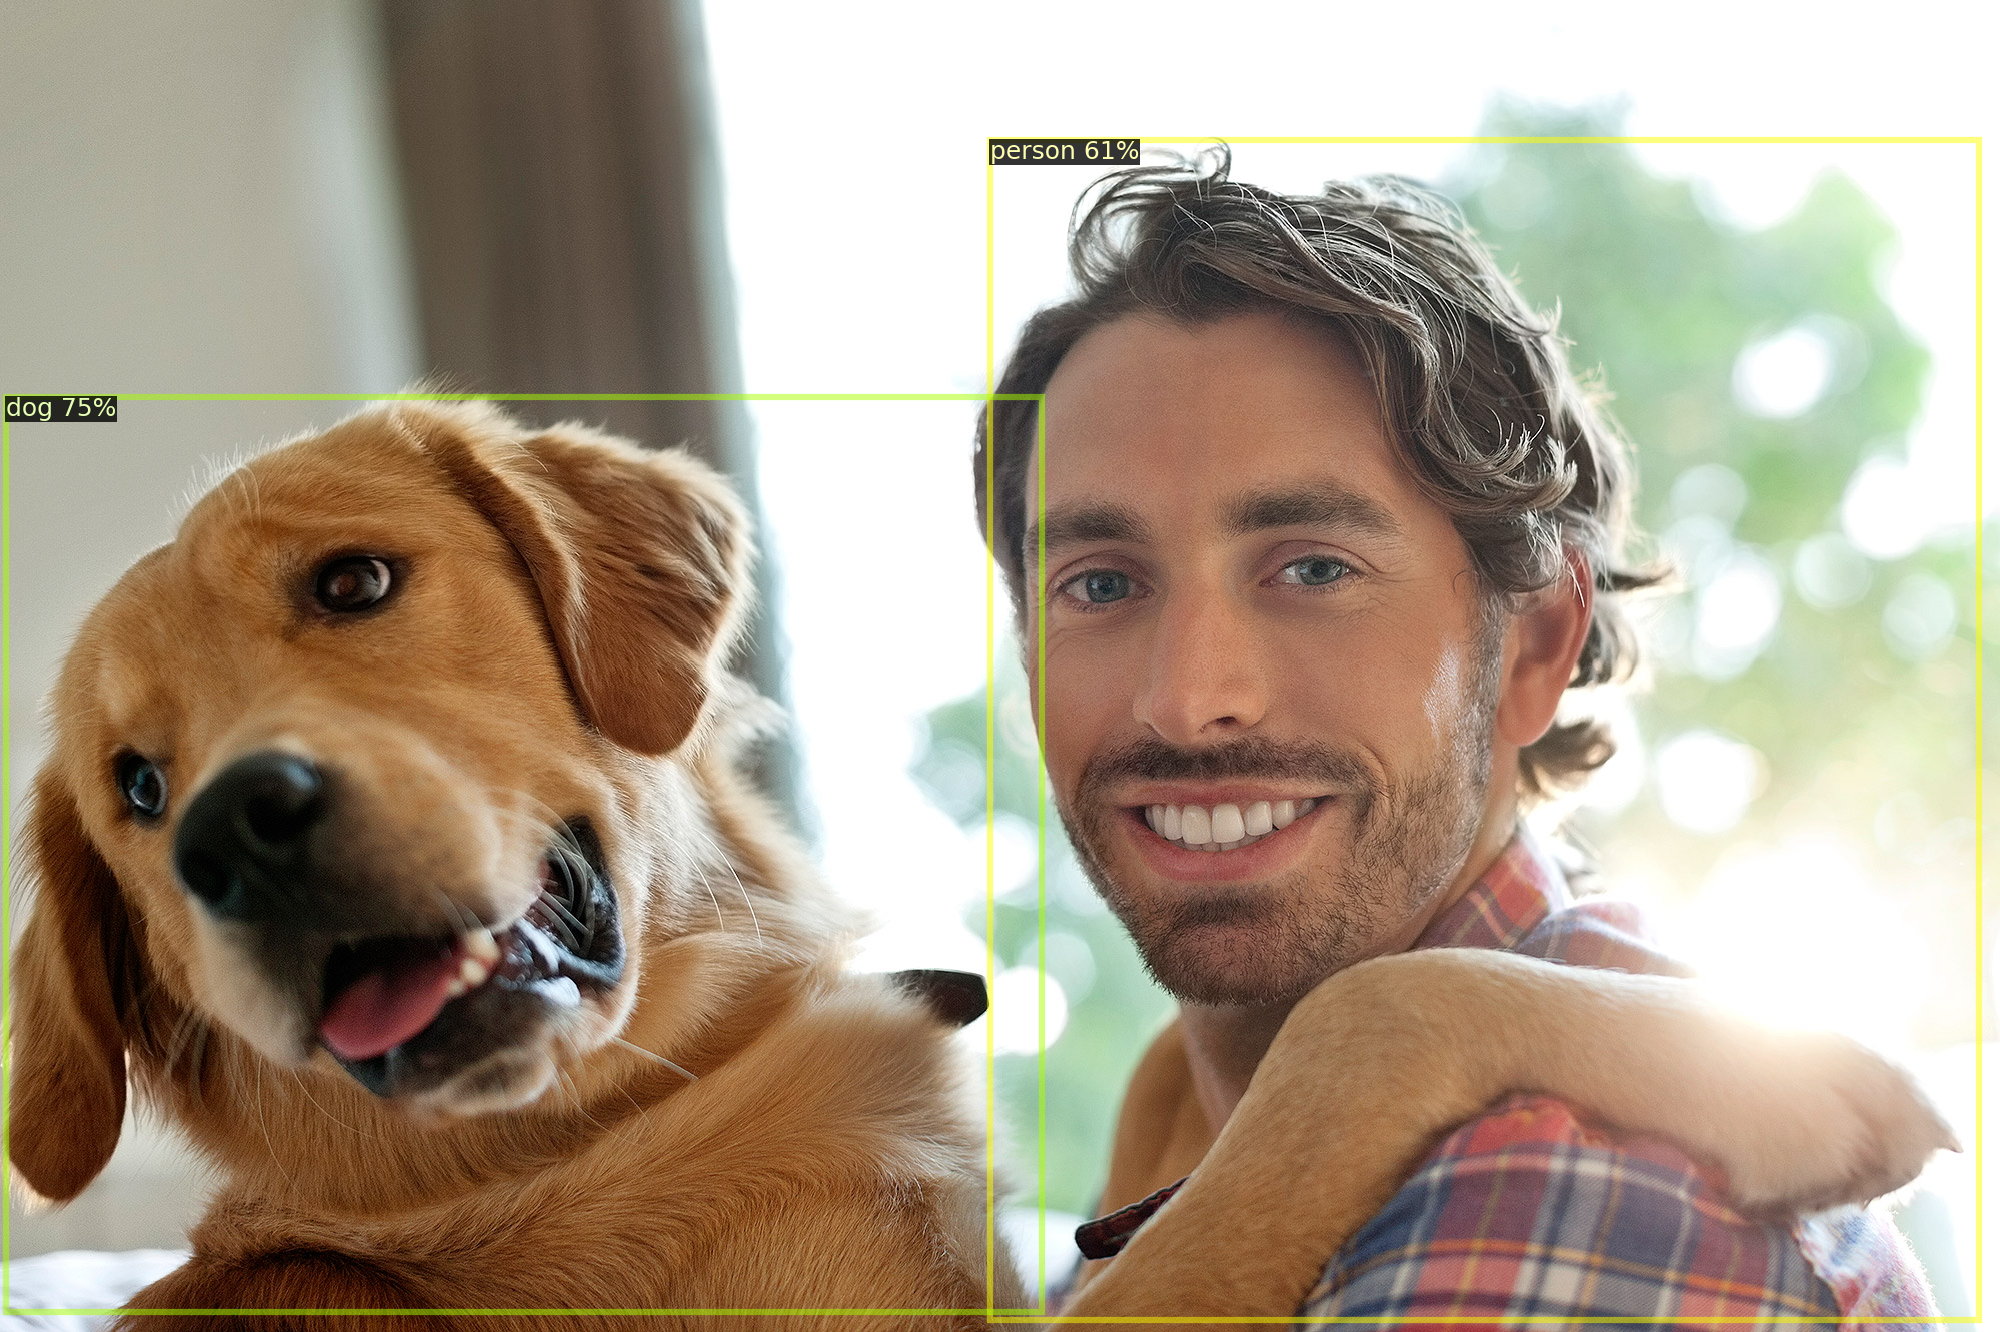

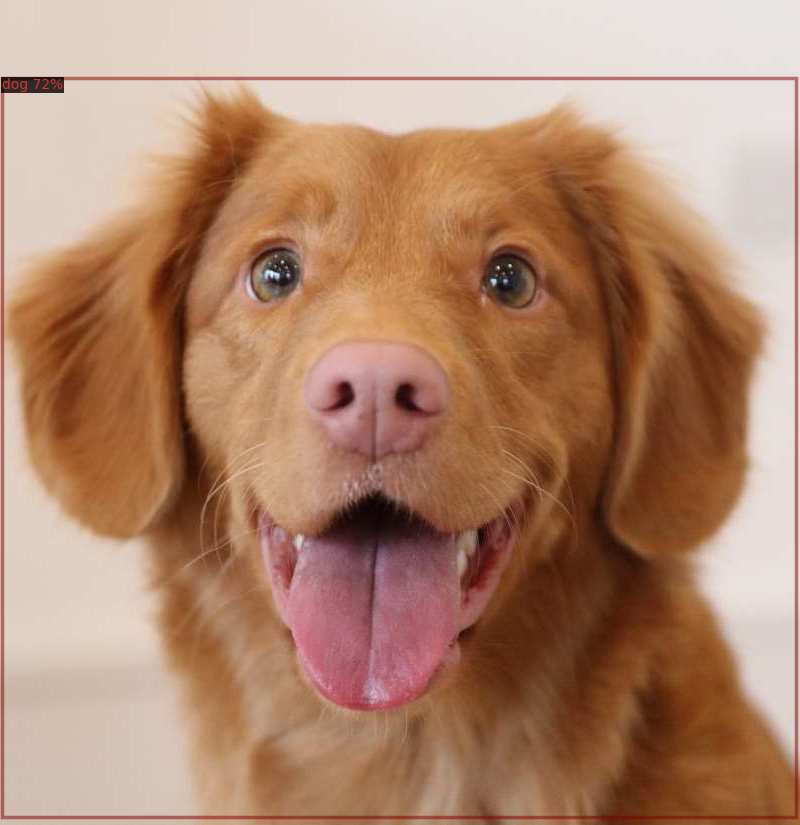

In [35]:
from google.colab.patches import cv2_imshow
import cv2
img1 = cv2.imread(r"/content/OneNet/output_image1.png",cv2.IMREAD_UNCHANGED)
img2 = cv2.imread(r"/content/OneNet/output_image2.png",cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
cv2_imshow(img2)